# Problem 6-3: Degree Correlations and Assortativity
Submission from Maria Kagkeli, Maria Regina Lily, Mihai Verzan

In [1]:
import igraph as ig
import os
import sys

In [2]:
def process_and_open(name):
    with open('data/' + name + '.txt') as file:
        lines = file.readlines()[2:]
        out = open('data/' + name + '_o.txt', 'w')
        for l in lines:
            out.write(l)

    G = ig.Graph.Read_Ncol('data/' + name + '_o.txt', directed=False)
    #file.close()
    #os.remove('data/' + name + '_o.txt')
    return G

In [3]:
adolescent = process_and_open('adolescent_health_network').simplify()
jdk = ig.Graph.Read_Ncol('data/JDK_dependency_network.txt').simplify()
openflights = process_and_open('openflights_network').simplify()

# so we can do the same thing to all graphs without having to duplicate code
graphs = [adolescent, jdk, openflights]

#### number of nodes and edges

In [5]:
def varname(a):
    return [k for k, v in locals().items() if v == a][0]

In [7]:
for g in graphs:
    print(
        [k for k,v in locals().items() if v == g][0], ": ",  # the long mess gets the variable name
        g.vcount(), 'vertices,', g.ecount(), 'edges')

adolescent :  2530 vertices, 10026 edges
jdk :  6424 vertices, 53821 edges
openflights :  2911 vertices, 15593 edges


In [9]:
for i in range(len(adolescent.knn()[1])):
    print(i, "   ", adolescent.knn()[1][i])

0     7.247058823529412
1     7.830708661417323
2     8.036093418259018
3     8.32888349514563
4     8.553424657534245
5     8.870778267254039
6     9.393598103141663
7     9.509414225941423
8     10.154348919054808
9     10.334659090909094
10     10.820887445887447
11     10.96834625322997
12     10.93949870354365
13     11.53448275862069
14     10.97654320987654
15     11.635416666666666
16     12.069716775599128
17     11.565656565656566
18     11.331983805668017
19     13.16
20     12.61904761904762
21     11.89090909090909
22     12.282608695652174
23     13.229166666666666
24     12.92
25     nan
26     14.277777777777779


In [10]:
import numpy as np

In [11]:
def assortativity_matrix(g):
    deg_max = max(g.degree())
    E = np.zeros((deg_max, deg_max))
    
    for v in g.vs:
        for n in g.neighbors(v['name']):
            E[g.degree(v['name']) - 1, g.degree(n) - 1] += 1
    
    E /= np.sum(E)
    
    return E

In [28]:
E = [assortativity_matrix(g) for g in graphs]

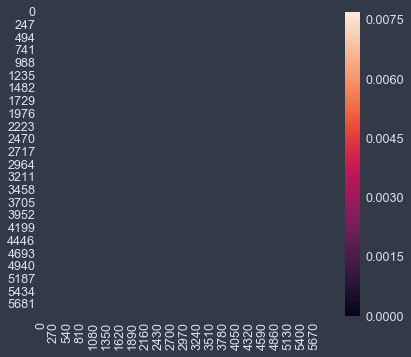

In [30]:
import seaborn as sns
import matplotlib.pylab as plt

from jupyterthemes import jtplot
jtplot.style()

ax = sns.heatmap(E[1], linewidth=0)
plt.show()

In [157]:
for v in g.vs:
    for n in g.neighbors(v['name']):
        print(g.degree(n))

NameError: name 'v' is not defined

In [47]:
def knn(g, vertex):
    return np.mean([g.degree(n) for n in g.neighbors(vertex)])

In [48]:
def knn_averaged(g, deg):
    l = []
    for v in g.vs:
        if g

7.8

In [55]:
adolescent.vs[0]

igraph.Vertex(<igraph.Graph object at 0x0000016515C8A8B8>, 0, {'name': '1'})

In [53]:
knn(jdk, 1000)

1566.6363636363637